In [2]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.4 MB/s eta 0:00:00


# 0.MovieLens 데이터를 활용

In [3]:
from torch_geometric.data import download_url, extract_zip
import pandas as pd
import numpy as np
#-- Libreco
# download the dataset
url = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
extract_zip(download_url(url, '.'), '.')

rating_path = '/content/ml-latest-small/ratings.csv'
item_path = "/content/ml-latest-small/movies.csv"

Extracting ./ml-latest-small.zip


In [ ]:
df = pd.read_csv(rating_path) #-- Ratings 데이터 읽어오기
print(df.dtypes)
df.head(5) #-- 최상단 5개의 프레임 확인

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# 1. 데이터 확인

### 1-1. 데이터 타입 변경

In [ ]:
# df1 = df  #-- 이와 같이 복사하면 Call by value가 아닌 call by reference라 df가 변경되면 df1도 변경되므로 .copy()를 이용하자
df1= df.copy() #-- 복사
# df1 = df1.astype({'rating' : 'object'}) #-- 원하는 칼럼의 데이터 타입을 변경
df1 = df1.astype({'rating' : 'float64', 'userId' : 'float64'}) #-- 원하는 칼럼의 데이터 타입을 여러개 변경
print(df1.dtypes)

userId       float64
movieId        int64
rating       float64
timestamp      int64
dtype: object


### 1-2. 원하는 데이터 출력

In [ ]:
print(df1['rating']) #-- userId 데이터만 가져옴

print(df1['rating'].value_counts()) #-- 각각의 값들이 몇 개 들어있는지 확인

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


# 2. 기초통계량(평균, 중앙값, IQR, 표준편차 등)


In [ ]:
df = pd.read_csv(rating_path)
print(df.shape) #-- 행렬 (100836, 4) -> 100836개의 데이터와 4개의 변수로 구성되어 있음
df.head(5)

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### 평균값 구하기(mean)

In [ ]:
rating_mean = df['rating'].mean()
print(rating_mean)

3.501556983616962


### 중앙값 구하기(median)

In [ ]:
rating_median = df['rating'].median()
print(rating_median)

3.5


### 최빈값 구하기(mode)


In [ ]:
rating_mode = df['rating'].mode()
print(rating_mode[0])
# print(df['rating'].value_counts())

4.0


### 분산(var)
분산이 크면 데이터 값들이 평균에서 넓게 퍼져 있다는 것을 의미하고, 분산이 작으면 데이터 값들이 평균에 가까이 모여 있다는 것을 의미한다.

In [ ]:
rating_var = df['rating'].var()
print(rating_var)

1.086867214296347


### 표준편차(std)
표준편차가 0에 가깝다는 것은 모든 데이터 값들이 거의 또는 완전히 평균값에 근접해 있다는 것을 의미한다.
데이터 값들이 평균값에서 멀리 떨어져 있을수록 표준편차는 커진다.

In [ ]:
rating_std = df['rating'].std()
print(rating_std)

1.042529239060635


### IQR(Q3- Q1)
QR은 데이터의 중간 부분이 얼마나 넓게 퍼져 있는지를 나타냅니다.  

예를 들어, 어떤 시험의 점수가 10, 20, 50, 60, 70, 80, 90점으로 나타났다고 가정해봅시다. 이 경우 중앙값은 60점이고, 하위 50%의 중앙값(Q1)은 20점, 상위 50%의 중앙값(Q3)은 80점일 것입니다. 그러므로 IQR은 80 - 20 = 60점이 됩니다. 이것은 대부분의 학생들이 20점과 80점 사이에 점수를 가지고 있음을 의미하며, 이 범위 밖의 점수는 상대적으로 드물다는 것을 나타냅니다.


In [ ]:
Q3 = df['rating'].quantile(.75)
print("Q3 data is : {}".format(Q3))
Q1 = df['rating'].quantile(.25)
print("Q1 data is : {}".format(Q1))
IQR = Q3 - Q1
print("IQR data is : {}".format(IQR))

Q3 data is : 4.0
Q1 data is : 3.0
IQR data is : 1.0


### 최대, 최소

In [ ]:
rating_max = df['rating'].max()
print("rating_max value is {}".format(rating_max))
rating_min = df['rating'].min()
print("rating_min value is {}".format(rating_min))
rating_range = rating_max - rating_min
print("rating_range is {}".format(rating_range))

rating_max value is 5.0
rating_min value is 0.5
rating_range is 4.5


### 왜도(skew)

In [ ]:
rating_skew = df['rating'].skew()
print(rating_skew)

-0.6371993892529214


### 첨도(kurt)

In [ ]:
rating_kurt = df['rating'].kurt()
print(rating_kurt)

0.12331407123922622


# 3. 그룹화하여 데이터 전처리, 데이터 인덱싱, 필터링, 정렬

In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')
print(df.head(5)) #-- species 재정렬

df.groupby('species').mean()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### 데이터 인덱싱

In [ ]:
df = pd.read_csv(rating_path)
print(df.shape) #-- 행렬 (100836, 4) -> 100836개의 데이터와 4개의 변수로 구성되어 있음
df.head(5)
df.loc[3, 'rating'] #-- 3번째가 아닌 인덱스번호 3을 가져옴

(100836, 4)


5.0

In [ ]:
df.loc[:, 'rating'] #-- rating만 가져옴
df.loc[0:3, ['rating', 'userId']] #-- 특정 인덱스구간의 원하는 데이터만 추출

,rating,userId
0,4.0,1
1,4.0,1
2,4.0,1
3,5.0,1


In [ ]:
df.head(5)#-- 앞에서 5개
df.tail(5)#-- 뒤에서 5개

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


### 열 추가/제거

In [ ]:
df_rating = df.rating
# df_rating = df['rating']
df_rating.head(5)

#-- 여러개 가져오기
df1 = df[['rating', 'userId']]
df1.head(3)

,rating,userId
0,4.0,1
1,4.0,1
2,4.0,1


In [ ]:
df_drop = df.copy()
df_drop = df_drop.drop(columns=['timestamp', 'movieId'])
df_drop.head(5)

,userId,rating
0,1,4.0
1,1,4.0
2,1,4.0
3,1,5.0
4,1,5.0


In [ ]:
#-- 열 추가
df_new = df.copy()
df_new['new'] = df['rating'].mean()
df_new.head(3)

,userId,movieId,rating,timestamp,new
0,1,1,4.0,964982703,3.501557
1,1,3,4.0,964981247,3.501557
2,1,6,4.0,964982224,3.501557


### 데이터 필터링

In [ ]:
ratings = (df["rating"] >=3) #-- 평점이 3이상만 필터링
useID = (df["userId"] <=5) #-- Id가 5이히만 필터링
print(len(df[ratings]))
print(len(df[useID]))

df[ratings & useID] #-- 2개 조건을 필터링

81763
560


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
555,5,594,5.0,847435238
556,5,595,5.0,847434832
557,5,596,5.0,847435292
558,5,597,3.0,847434962


# 4. 데이터 정렬

### 내림차순 정렬

In [ ]:
df = pd.read_csv(rating_path)
df.sort_values('rating', ascending = False).head(5)

,userId,movieId,rating,timestamp
34031,232,3147,5.0,1218164903
50717,328,1080,5.0,1494210450
18166,115,487,5.0,944951378
18165,115,480,5.0,944953733
76157,479,3308,5.0,1039362558


### 오름차순 정렬

In [ ]:
df = pd.read_csv(rating_path)
df.sort_values('rating', ascending = True).head(5)

,userId,movieId,rating,timestamp
3752,22,53519,0.5,1268727137
60861,393,5445,0.5,1430506636
47025,307,2017,0.5,1186173639
22446,153,1198,0.5,1525548264
60865,393,5902,0.5,1430507509


# 5. 데이터 변경

In [ ]:
df = pd.read_csv(rating_path)

#-- rating의 값이 3이하인 값은 0으로 만들고 나머지는 그냥 유지
df['rating'] = np.where(df['rating'] >= 3, df['rating'],0)
#-- rating 프레임의 데이터 중 조건식이 true이면 1번째, false이면 2번째 값 대입

df.sort_values('rating', ascending = True).head(5)

,userId,movieId,rating,timestamp
47138,307,2907,0.0,1186172679
44510,297,1037,0.0,900876328
17071,108,5502,0.0,1042839211
72623,469,1301,0.0,965335350
90251,586,176371,0.0,1529899177


# 데이터 결측치, 이상치, 중복치 제거(타이타닉 데이터세트)

In [4]:
#-- 타이타닉 데이터 불러오기
import seaborn as sns
df = sns.load_dataset('titanic')
print(df.shape) #-- 15개의 변수와 891개의 변수
print(df.info())
df.head(5)

#-- 종속 변수 Y : 생존 여부(servied)
#-- 독립 변수 X : 성별, 나이등의 탑승자 정보

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. 결측치 처리

### 결측치 확인(isnull())

In [5]:
print(df.isnull().sum()) #-- 결측치 확인
print(df.dropna(axis=0).shape) #-- 행 기준 제거 --> 데이터를 삭제함 (기본값이므로 axis값을 안줘도 된다.)
print(df.dropna(axis=1).shape) #-- 열 기준 제거 --> 변수를 삭제함

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
(182, 15)
(891, 11)


In [8]:
df1 = df.copy()
df1 = pd.DataFrame(df)
#-- 데이터를 복사할 때 Seanborn 데이터를 다시 데이터프레임 해줘야 함

### 결측치 대체

In [20]:
df1_median = df1['age'].median()
print(df1_median) #-- 중앙값 계산

df1_mean = df1['age'].mean()
print(df1_mean)   #-- 평균값 계산

df1['age'] = df['age'].fillna(df1_median) #-- 구한 중앙값(평균값)으로 결측치 대체
df1.isnull().sum()

28.0
29.36158249158249


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2. 이상치 처리

### 상자그림 활용 (이상치 : Q1, Q3으로부터 1.5 * IQR을 초과하는 값)

<Axes: >

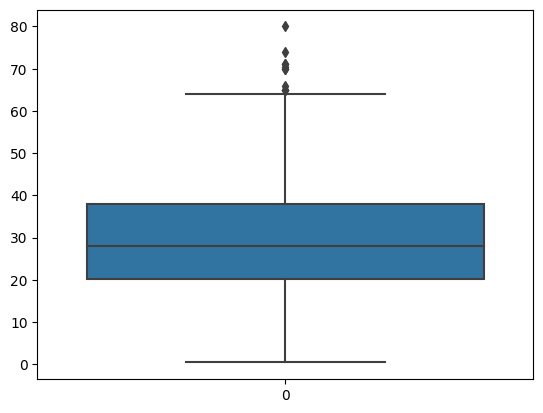

In [24]:
df = sns.load_dataset('titanic')
# df.head(5)
sns.boxplot(df['age'])

In [31]:
#-- Q1, Q3, IQR(Q3-Q1)을 구하기
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 is : {} Q3 is {} IQR is {}".format(Q1, Q3, IQR))

#-- 위아래 이상치 구하기
upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

print("upper is {} lower is {}".format(upper, lower))

Q1 is : 20.125 Q3 is 38.0 IQR is 17.875
upper is 64.8125 lower is -6.6875


문제 : age 변수의 이상치를 제외한 데이터의 수는? (상자그림 기준)

In [37]:
cond1 = (df['age'] <= upper)
cond2 = (df['age'] >= lower)
print(len(df[cond1 & cond2]))

703


### 표준정규분포를 활용(이상치 : +=3Z값을 넘어가는 값)  
Z = (개별값 - 평균값) / 표준편차

In [48]:
#-- 평균값, 표준편차 계산
mean_value = df['age'].mean()
std_value = df['age'].std()
print("mean_value is {},  std_value is {}".format(mean_value, std_value))

zscore = (df['age']-mean_value) / std_value
print("Z value is {}".format(zscore))

cond1 = (zscore > 3)
cond2 = (zscore < -3)
print(len(df[cond1]) + len(df[cond2]))

mean_value is 29.69911764705882,  std_value is 14.526497332334042
Z value is 0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64
2


## 3. 중복값 처리

In [54]:
df = sns.load_dataset('titanic')
print(df.shape)

df1 = df.copy()
df1 = df1.drop_duplicates() #-- 데이터가 중복이 있는경우 삭제

print(df1.shape)

(891, 15)
(784, 15)


# 데이터 스케일링(데이터 표준화, 정규화)

### 1. 데이터 표준화 (Z-score nomalization)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
df = sns.load_dataset('titanic')
df = pd.DataFrame(df)

zscaler = StandardScaler()
df['fare'] = zscaler.fit_transform(df[['fare']])
# df.head()

#-- 평균이 0 표준편차가 1인 정규분포로 변환이 잘 되었는지 확인
print("평균 값 {} 표준편차 값 {}".format(df['fare'].mean(), df['fare'].std()))

평균 값 3.987332972840069e-18 표준편차 값 1.0005616400330457


### 2. 데이터 정규화(min-max nomalization)


In [69]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
df = sns.load_dataset('titanic')
df = pd.DataFrame(df)

min_max_scaler = MinMaxScaler()
df['fare'] = min_max_scaler.fit_transform(df[['fare']])

print("최소 값 {} 최대 값 {}".format(df['fare'].min(), df['fare'].max()))

최소 값 0.0 최대 값 1.0


# 데이터 합치기(나온적은 없음)

In [102]:
df = sns.load_dataset('iris')
# df.head()

df1 = df.loc[0:30,]
df2 = df.loc[31:60,]

df_sum = pd.concat([df1, df2], axis = 0) #-- 행 방향으로 합침
print(df1.shape, df2.shape, df_sum.shape)



(31, 5) (30, 5) (61, 5)


# 날짜/시간 데이터, 인덱스 다루기

### 1. 날짜 데이터 다루기

In [103]:
#-- 임의의 날짜 데이터 생성
df = pd.DataFrame({
    '날짜':['20230105', '20230105', '20230223', '20230223', '20230312', '20230422', '20230511'],
    '물품':['A', 'B', 'A', 'B', 'A', 'B', 'A'],
    '판매수' :[5, 10, 15, 15, 20, 25, 40],
    '개당수익' : [500, 600, 500, 600, 600, 700, 600]
  })

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      7 non-null      object
 1   물품      7 non-null      object
 2   판매수     7 non-null      int64 
 3   개당수익    7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [105]:
#-- 날짜 데이터를 데이터타입을 변경
df['날짜'] =  pd.to_datetime(df['날짜'])
#-- 년, 월, 일 데이터로 분할
df['year'] =  df['날짜'].dt.year
df['month'] =  df['날짜'].dt.month
df['day'] =  df['날짜'].dt.day
# df.head(5)

#-- 날짜 구간 필터링(방법 1)
df[df['날짜'].between('2023-01-01', '2023-01-31')]

,날짜,물품,판매수,개당수익,year,month,day
0,2023-01-05,A,5,500,2023,1,5
1,2023-01-05,B,10,600,2023,1,5


In [110]:
#-- 날짜 구간 필터링(방법 2)
#-- 임의의 날짜 데이터 생성
df = pd.DataFrame({
    '날짜':['20230105', '20230105', '20230223', '20230223', '20230312', '20230422', '20230511'],
    '물품':['A', 'B', 'A', 'B', 'A', 'B', 'A'],
    '판매수' :[5, 10, 15, 15, 20, 25, 40],
    '개당수익' : [500, 600, 500, 600, 600, 700, 600]
  })

df['날짜'] =  pd.to_datetime(df['날짜'])
df = df.set_index('날짜', drop = True) #-- Drop = True(디폴트) 해당 변수를 제거
# df
print(df.loc["2023-01-05": "2023-01-31"])

           물품  판매수  개당수익
날짜                      
2023-01-05  A    5   500
2023-01-05  B   10   600


### 2. 시간 데이터 다루기

In [114]:
#-- 임의의 시간 데이터 생성
df = pd.DataFrame({
    '물품':['A', 'B', 'A', 'B', 'A', 'B', 'A'],
    '판매수' :[5, 10, 15, 15, 20, 25, 40],
    '개당수익' : [500, 600, 500, 600, 600, 700, 600]
  })

time = pd.date_range('2023-09-24 12:25:00' ,'2023-09-25 14:45:30', periods = 7)
df['time'] = time
df = df [['time', '물품', '판매수', '개당수익']] #-- 위치 재정렬

df = df.set_index('time') #-- time으로 인덱스 설정


,물품,판매수,개당수익
time,,,
2023-09-24 12:25:00,A,5,500
2023-09-24 16:48:25,B,10,600
2023-09-24 21:11:50,A,15,500
2023-09-25 01:35:15,B,15,600
2023-09-25 05:58:40,A,20,600
2023-09-25 10:22:05,B,25,700
2023-09-25 14:45:30,A,40,600


In [116]:
df.loc["2023-09-24 12:25:00":"2023-09-25 00:25:00"]

,물품,판매수,개당수익
time,,,
2023-09-24 12:25:00,A,5,500
2023-09-24 16:48:25,B,10,600
2023-09-24 21:11:50,A,15,500
